# Pizza Resturant Analytics

We're going to answer the following questions:
1. In which cities or states are pizza restaurants most common?
2. How do pizza prices vary across geographies?
3. What words are most often used to describe pizzas?

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import Bokeh packages for interactive plots
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper
from bokeh.tile_providers import CARTODBPOSITRON_RETINA
from bokeh.palettes import Category20b, Category20c, Spectral
from bokeh.layouts import gridplot

In [12]:
# read pizza data
pizza = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/8358_1.csv")
pizza.head()

,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,22.50,15.50,USD,2016-03-31T02:19:42Z,NaN,Bianca Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
1,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,18.95,18.95,USD,2016-03-31T02:19:42Z,NaN,Cheese Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
2,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,12.00,12.00,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Margherita",The Brentwood,90049,USD,50.0,55.0,Brentwood
3,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,13.00,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Mushroom",The Brentwood,90049,USD,50.0,55.0,Brentwood
4,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,13.00,USD,2015-10-23T03:57:26Z,"Olives, onions, capers, tomatoes","Pizza, Puttenesca",The Brentwood,90049,USD,50.0,55.0,Brentwood


In [13]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 21 columns):
id                    3510 non-null object
address               3510 non-null object
categories            3510 non-null object
city                  3510 non-null object
country               3510 non-null object
keys                  3510 non-null object
latitude              3510 non-null float64
longitude             3510 non-null float64
menuPageURL           610 non-null object
menus.amountMax       2948 non-null float64
menus.amountMin       2948 non-null float64
menus.currency        2951 non-null object
menus.dateSeen        3510 non-null object
menus.description     1526 non-null object
menus.name            3510 non-null object
name                  3510 non-null object
postalCode            3484 non-null object
priceRangeCurrency    1557 non-null object
priceRangeMin         1557 non-null float64
priceRangeMax         1557 non-null float64
province              3510 n

In [21]:
# extract interested columns
pizza_sub = pizza.copy()[['id', 'city', 'address', 'postalCode', 
                          'menus.name', 'latitude', 'longitude',
                          'menus.amountMax', 'menus.amountMin']]
pizza_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 9 columns):
id                 3510 non-null object
city               3510 non-null object
address            3510 non-null object
postalCode         3484 non-null object
menus.name         3510 non-null object
latitude           3510 non-null float64
longitude          3510 non-null float64
menus.amountMax    2948 non-null float64
menus.amountMin    2948 non-null float64
dtypes: float64(4), object(5)
memory usage: 246.9+ KB


# Most Popular Pizza Name

In [22]:
# drop duplicates
pizza_sub = pizza_sub.drop_duplicates(subset=['id', 'menus.name'])

# count the pizza names
names_of_pizza = pizza_sub['menus.name'].value_counts()

# merge `names_of_pizza` to `pizza_sub`
pizza_sub = pd.merge(pizza_sub, names_of_pizza.to_frame(),
                     left_on='menus.name', right_index=True, how='left')

pizza_sub.head()

,id,city,address,postalCode,menus.name_x,latitude,longitude,menus.amountMax,menus.amountMin,menus.name_y
0,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Bianca Pizza,44.102665,-121.300797,22.50,15.50,3
1,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Cheese Pizza,44.102665,-121.300797,18.95,18.95,130
2,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00,1
3,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00,1
4,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00,1


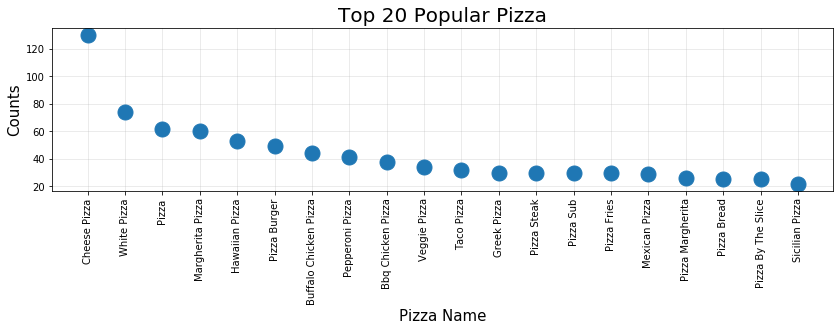

In [23]:
plt.figure(figsize=(14,3))
plt.plot(names_of_pizza.head(20), linestyle='none', markersize=15, marker='o')
plt.title('Top 20 Popular Pizza', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Pizza Name', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.grid(alpha=.3)
plt.margins(.05)
plt.show()

# Get the State information for each pizza restaurant

In [0]:
# Download and unzip our zipfile
from urllib.request import urlopen
from zipfile import ZipFile

zipurl = 'https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/14zpallagi.csv.zip'
zipresp = urlopen(zipurl) # Create a new file on the hard drive
tempzip = open("/tmp/tempfile.zip", "wb") # Write the contents of the downloaded file into the new file
tempzip.write(zipresp.read()) # Close the newly-created file
tempzip.close() # Re-open the newly-created file with ZipFile()
zf = ZipFile("/tmp/tempfile.zip") # Extract its contents into <extraction_path>
zf.extractall(path = '') # note that extractall will automatically create the path, left blank so it's in working directory
# close the ZipFile instance
zf.close()

In [25]:
# read zipcode data
zipcode = pd.read_csv('14zpallagi.csv', usecols=['STATE', 'zipcode'], dtype={'zipcode': 'str'})
zipcode.head()

,STATE,zipcode
0,AL,00000
1,AL,00000
2,AL,00000
3,AL,00000
4,AL,00000


In [26]:
# drop duplicates
zipcode = zipcode.drop_duplicates(['zipcode'])
zipcode.head()

,STATE,zipcode
0,AL,00000
6,AL,35004
12,AL,35005
18,AL,35006
24,AL,35007


In [27]:
# merge `pizza data` and `zipcode data`
pizza_merge = pd.merge(pizza_sub, zipcode, left_on='postalCode', right_on='zipcode', how='left')
pizza_merge.head()

,id,city,address,postalCode,menus.name_x,latitude,longitude,menus.amountMax,menus.amountMin,menus.name_y,STATE,zipcode
0,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Bianca Pizza,44.102665,-121.300797,22.50,15.50,3,OR,97701
1,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Cheese Pizza,44.102665,-121.300797,18.95,18.95,130,OR,97701
2,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00,1,CA,90049
3,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00,1,CA,90049
4,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00,1,CA,90049


#Count the number of pizza restaurants by State

In [28]:
# count the restaurants by State
counts = pizza_merge.STATE.value_counts()

# merge
pizza_clean = pd.merge(pizza_merge, counts.to_frame(), 
                       left_on='STATE', right_index=True, how='left')

# drop unused columns and missing values
pizza_clean = pizza_clean.drop(['id', 'postalCode', 'zipcode'], axis=1).dropna()

# rename columns
pizza_clean.columns = ['city', 'address', 'pizza_name',
                        'latitude', 'longitude', 
                        'menus_amountMax', 'menus_amountMin',
                        'pizza_counts', 'state', 'state_counts']

# set the size of dot for scatterplot later
pizza_clean['dot_size'] = pizza_clean.menus_amountMax**.55
pizza_clean.head()

,city,address,pizza_name,latitude,longitude,menus_amountMax,menus_amountMin,pizza_counts,state,state_counts,dot_size
0,Bend,Cascade Village Mall Across From Target,Bianca Pizza,44.102665,-121.300797,22.50,15.50,3,OR,24.0,5.542432
1,Bend,Cascade Village Mall Across From Target,Cheese Pizza,44.102665,-121.300797,18.95,18.95,130,OR,24.0,5.042955
2,Los Angeles,148 S Barrington Ave,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00,1,CA,326.0,3.922380
3,Los Angeles,148 S Barrington Ave,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00,1,CA,326.0,4.098914
4,Los Angeles,148 S Barrington Ave,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00,1,CA,326.0,4.098914


# Convert coordinates
Because latitude, longitude and elevation is a 3D coordinate system, plus that a map we are about to use is 2D, we need to project 3D coordinates system (latitude and longitude) on 2D coordinate system (x and y) for drawing data on a map.

In [0]:
# define functions for coordinate projection
import math

def lgn2x(a):
    return a * (math.pi/180) * 6378137

def lat2y(a):
    return math.log(math.tan(a * (math.pi/180)/2 + math.pi/4)) * 6378137


In [30]:
# project coordinates
pizza_clean['x'] = pizza_clean.longitude.apply(lambda row: lgn2x(row))
pizza_clean['y'] = pizza_clean.latitude.apply(lambda row: lat2y(row))

# drop unused columns
pizza_clean = pizza_clean.drop(['latitude', 'longitude'], axis=1)
pizza_clean.head()

,city,address,pizza_name,menus_amountMax,menus_amountMin,pizza_counts,state,state_counts,dot_size,x,y
0,Bend,Cascade Village Mall Across From Target,Bianca Pizza,22.50,15.50,3,OR,24.0,5.542432,-1.350314e+07,5.481344e+06
1,Bend,Cascade Village Mall Across From Target,Cheese Pizza,18.95,18.95,130,OR,24.0,5.042955,-1.350314e+07,5.481344e+06
2,Los Angeles,148 S Barrington Ave,"Pizza, Margherita",12.00,12.00,1,CA,326.0,3.922380,-1.318791e+07,4.037475e+06
3,Los Angeles,148 S Barrington Ave,"Pizza, Mushroom",13.00,13.00,1,CA,326.0,4.098914,-1.318791e+07,4.037475e+06
4,Los Angeles,148 S Barrington Ave,"Pizza, Puttenesca",13.00,13.00,1,CA,326.0,4.098914,-1.318791e+07,4.037475e+06


In [32]:
# drop duplicated restaurants and keep the most expensive one
pizza_map = (pizza_clean.sort_values(['menus_amountMax'], ascending=[0])
             .drop_duplicates(subset=['city', 'address']))

# create ColumnDataSource
cds = ColumnDataSource(pizza_map)

# customize hover tool
hover = HoverTool(tooltips=[('City', '@city'),
                            ('Address', '@address'),
                            ('Pizza', '@pizza_name'),
                            ('Max price', '@menus_amountMax')],
                  mode='mouse')

# UPPER FIGURE
# initialize a figure
up = figure(title='Location of Pizza Restaurants in US',
           plot_width=780, plot_height=360,
           x_axis_location=None, y_axis_location=None, 
           tools=['pan', 'wheel_zoom', 'tap', 'reset', 'crosshair', hover])

# overlap map
up.add_tile(CARTODBPOSITRON_RETINA)

# create color mapper
mapper = CategoricalColorMapper(factors=pizza_map.state.unique(), 
                                palette=Category20b[20]+Category20c[20]+Spectral[4])

# add pizza location
scatter = up.circle('x', 'y', source=cds, size='dot_size',
                    color={'field': 'state','transform': mapper}, alpha=.5,
                    selection_color='black',
                    nonselection_fill_alpha=.1,
                    nonselection_fill_color='gray',)
                  

# BOTTOM FIGURE
# initialize a figure
down = figure(title='Number of Restaurants in each State (Click bar below)',
              x_range=pizza_map.state.unique(),
              plot_width=780, plot_height=200,
              tools=['tap', 'reset'])

# add restaurant counts
down.vbar(x='state', top='state_counts', source=cds, width=.7,
            color={'field': 'state','transform': mapper},
            selection_color='black',
            nonselection_fill_alpha=.1,
            nonselection_fill_color='gray',)


# set graph properties
down.xgrid.grid_line_color = None
down.xaxis.major_label_orientation = 'vertical'
down.xaxis.axis_label = 'State'
down.yaxis.axis_label = 'Count'
p = gridplot([[up], [down]], toolbar_location='left',)

# show the plot
show(p)

RuntimeError: ignored